In [1]:
import netCDF4     
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
plt.rcParams['figure.figsize'] = 15,8

#read grid paramenters
grid_CMAQ=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')

#lon and lat to np array
lon=np.array(grid_CMAQ.variables['LON'][0,0,:,:])
lat=np.array(grid_CMAQ.variables['LAT'][0,0,:,:])



In [9]:
dic_ann={}

In [20]:
dic_ann['jedna']=5
dic_ann['dva']='shmu'

In [21]:
dic_ann

{'jedna': 5, 'dva': 'shmu'}

In [23]:
dic_ann.keys()

dict_keys(['jedna', 'dva'])

In [24]:
dic_ann.values()

dict_values([5, 'shmu'])

In [27]:
dic_ann={}
for i in grid_CMAQ.variables.keys():
    if i !='TFLAG':
       dic_ann[i]=np.array(grid_CMAQ.variables[i][0,0,:,:]) 

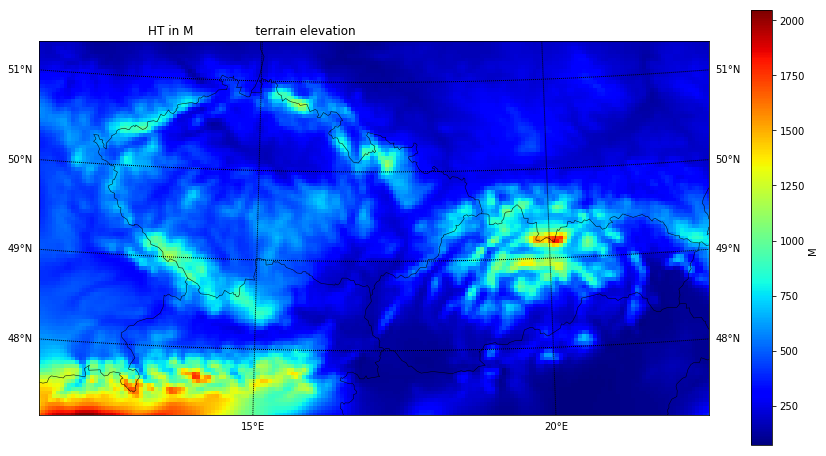

In [31]:
meridians = np.arange(10.,35.,5.)
pararels = np.arange(45.,52.,1.)
mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833780,height=466351,resolution='i')
mapb.drawcountries()
mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])

# choose one of the two style of the plot
mapb.pcolormesh(lon,lat,dic_ann['HT'],cmap=plt.cm.jet,latlon=True) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0}'.format(grid_CMAQ.variables['HT'].units))
plt.title('{0} in {1} {2}'.format('HT',grid_CMAQ.variables['HT'].units,grid_CMAQ.variables['HT'].var_desc))
plt.show()
plt.close()